In [7]:
import pandas as pd 
import numpy as np 

In [8]:
combined_df = pd.read_csv("combined_df.csv", index_col=0)

In [9]:
combined_df.head()

,geography,stratum,date,organism,resistance_pct,series_id,model_region,prescribing_rate,month,lag_1,...,lag_8,lag_9,lag_10,lag_11,lag_12,presc_lag_1,presc_lag_3,presc_lag_6,trend,prescribing_x_month
12,East Midlands,Amikacin,2021-10-01,E-coli,1.52,E-coli__Amikacin__East Midlands,Midlands,1.34,10,1.85,...,0.17,0.53,0.93,0.92,0.53,1.31,1.28,1.25,0.21,13.40
13,East Midlands,Amikacin,2021-11-01,E-coli,1.17,E-coli__Amikacin__East Midlands,Midlands,1.37,11,1.52,...,0.94,0.17,0.53,0.93,0.92,1.34,1.30,1.25,-0.55,15.07
14,East Midlands,Amikacin,2021-12-01,E-coli,0.72,E-coli__Amikacin__East Midlands,Midlands,1.41,12,1.17,...,1.59,0.94,0.17,0.53,0.93,1.37,1.31,1.26,-0.68,16.92
15,East Midlands,Amikacin,2022-01-01,E-coli,1.90,E-coli__Amikacin__East Midlands,Midlands,1.41,1,0.72,...,1.65,1.59,0.94,0.17,0.53,1.41,1.34,1.28,-0.80,1.41
16,East Midlands,Amikacin,2022-02-01,E-coli,2.43,E-coli__Amikacin__East Midlands,Midlands,1.43,2,1.90,...,1.93,1.65,1.59,0.94,0.17,1.41,1.37,1.30,0.73,2.86


In [10]:
combined_df.shape

(13578, 26)

In [11]:
combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')

In [12]:
combined_df = combined_df.sort_values(
    ['geography', 'organism', 'stratum', 'date']
)

In [13]:
combined_df["month"] = combined_df["date"].dt.month

In [14]:
print(combined_df[["date", "month"]].head())


         date  month
12 2021-10-01     10
13 2021-11-01     11
14 2021-12-01     12
15 2022-01-01      1
16 2022-02-01      2


In [15]:
combined_df.head()

,geography,stratum,date,organism,resistance_pct,series_id,model_region,prescribing_rate,month,lag_1,...,lag_8,lag_9,lag_10,lag_11,lag_12,presc_lag_1,presc_lag_3,presc_lag_6,trend,prescribing_x_month
12,East Midlands,Amikacin,2021-10-01,E-coli,1.52,E-coli__Amikacin__East Midlands,Midlands,1.34,10,1.85,...,0.17,0.53,0.93,0.92,0.53,1.31,1.28,1.25,0.21,13.40
13,East Midlands,Amikacin,2021-11-01,E-coli,1.17,E-coli__Amikacin__East Midlands,Midlands,1.37,11,1.52,...,0.94,0.17,0.53,0.93,0.92,1.34,1.30,1.25,-0.55,15.07
14,East Midlands,Amikacin,2021-12-01,E-coli,0.72,E-coli__Amikacin__East Midlands,Midlands,1.41,12,1.17,...,1.59,0.94,0.17,0.53,0.93,1.37,1.31,1.26,-0.68,16.92
15,East Midlands,Amikacin,2022-01-01,E-coli,1.90,E-coli__Amikacin__East Midlands,Midlands,1.41,1,0.72,...,1.65,1.59,0.94,0.17,0.53,1.41,1.34,1.28,-0.80,1.41
16,East Midlands,Amikacin,2022-02-01,E-coli,2.43,E-coli__Amikacin__East Midlands,Midlands,1.43,2,1.90,...,1.93,1.65,1.59,0.94,0.17,1.41,1.37,1.30,0.73,2.86


In [16]:
combined_df.shape

(13578, 26)

In [17]:
lstm_df = combined_df[
    ["geography",
    "organism",
    "stratum",
    "date",
    "resistance_pct",
    "prescribing_rate",
    "month"
]
].copy()

In [121]:
# Use sine/cosine encoding for cyclical features
#Month 12 and Month 1 are adjacent, but scaling treats them as far apart (12 vs 1)
#Sin/cos encoding: December (12) and January (1) have similar encodings
#Helps model learn seasonal patterns correctly
lstm_df["month_sin"] = np.sin(2 * np.pi * lstm_df['date'].dt.month / 12)
lstm_df["month_cos"] = np.cos(2 * np.pi * lstm_df['date'].dt.month / 12)


In [122]:
lstm_df.head()

,geography,organism,stratum,date,resistance_pct,prescribing_rate,month,month_sin,month_cos
12,East Midlands,E-coli,Amikacin,2021-10-01,1.52,1.34,10,-8.660254e-01,0.500000
13,East Midlands,E-coli,Amikacin,2021-11-01,1.17,1.37,11,-5.000000e-01,0.866025
14,East Midlands,E-coli,Amikacin,2021-12-01,0.72,1.41,12,-2.449294e-16,1.000000
15,East Midlands,E-coli,Amikacin,2022-01-01,1.90,1.41,1,5.000000e-01,0.866025
16,East Midlands,E-coli,Amikacin,2022-02-01,2.43,1.43,2,8.660254e-01,0.500000


In [127]:
train_df = lstm_df[lstm_df["date"] < "2023-03-01"].copy()
val_df = lstm_df[
    (lstm_df["date"] >= "2023-03-01") & 
    (lstm_df["date"] < "2024-03-01")
].copy()
test_df =lstm_df[lstm_df["date"] >= "2024-03-01"].copy()

In [128]:
print(f"\nTrain: {len(train_df)} rows")
print(f"\nTrain: {len(val_df)} rows")
print(f"\nTest: {len(test_df)} rows")


Train: 5850 rows

Train: 3312 rows

Test: 4416 rows


In [129]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

In [130]:
# Scale BOTH features together
train_features_scaled = feature_scaler.fit_transform(
    train_df[["resistance_pct", "prescribing_rate"]]
)
val_features_scaled = feature_scaler.transform(
    val_df[["resistance_pct", "prescribing_rate"]]
)
test_features_scaled = feature_scaler.transform(
    test_df[["resistance_pct", "prescribing_rate"]]
)

# Assign back to dataframes
train_df[["resistance_pct_feat", "prescribing_rate_feat"]] = train_features_scaled
val_df[["resistance_pct_feat", "prescribing_rate_feat"]] = val_features_scaled
test_df[["resistance_pct_feat", "prescribing_rate_feat"]] = test_features_scaled

# Scale target using ORIGINAL data (before any scaling)
train_df["resistance_pct_target"] = target_scaler.fit_transform(
    combined_df.loc[train_df.index, ["resistance_pct"]]
)
val_df["resistance_pct_target"] = target_scaler.transform(
    combined_df.loc[val_df.index, ["resistance_pct"]]
)
test_df["resistance_pct_target"] = target_scaler.transform(
    combined_df.loc[test_df.index, ["resistance_pct"]]
)

In [98]:
def build_sequences(
        df, #dataframe
        seq_len = 12, # i want the model to look at the last 12 months at a time
        horizon=6, # want the model to predict the next 6 months
        features=["resistance_pct_feat", "prescribing_rate_feat", "month_sin","month_cos" ], # things my model will see every month
        target = "resistance_pct_scaled" #what model will predict
):
    X, y = [], []  # empty arrays X will store the past months and y will store the future



    # each bacterium-antibiotic-region is its own time series
    #split the big df into small tables 
    for series_key, series_dataframe in df.groupby(
        ["geography", "organism", "stratum"] #put all the rows with the same of these features into the same pile
    ): 
        #ensure the chronological order
        series_dataframe = series_dataframe.sort_values("date")

        #extract feature matrix and the target value
        feature_matrix = series_dataframe[features].values
        target_vector = series_dataframe[target].values

        #sliding window over time

        for start_index in range(
            len(series_dataframe) - seq_len - horizon + 1
        ):
            end_input = start_index + seq_len
            end_target = end_input + horizon

            #past 12 months -> model input
            X.append(
                feature_matrix[start_index:end_input]
            )
            y.append(
                target_vector[end_input:end_target]
            )

    return np.array(X), np.array(y)

In [99]:
X_train, y_train = build_sequences(train_df)
X_val, y_val = build_sequences(val_df)
X_test, y_test = build_sequences(test_df)

In [100]:
print("X_train: ", X_train.shape)
print("y_train:", y_train.shape)


X_train:  (2331, 12, 3)
y_train: (2331, 6)


In [27]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [28]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [103]:
model = Sequential([
    LSTM(
        64,
        input_shape=(12,3),
        return_sequences = False
    ),
    Dropout(0.2),
    Dense(6)
])

/opt/anaconda3/envs/amr/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [104]:
model.compile(
    optimizer = "adam",
    loss="mse"
)

In [105]:
early = EarlyStopping(
    patience=5,
    restore_best_weights=True
)

In [106]:
history = model.fit(
    X_train,
    y_train,
    validation_data = (X_val, y_val),
    epochs=20,
    batch_size = 64,
    callbacks=[early],
    verbose=1
)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5941 - val_loss: 0.1437
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1381 - val_loss: 0.0386
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0879 - val_loss: 0.0289
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0726 - val_loss: 0.0264
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0700 - val_loss: 0.0239
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0618 - val_loss: 0.0233
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0581 - val_loss: 0.0237
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0541 - val_loss: 0.0230
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0541 - val_loss: 0.0230
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0531 - val_loss: 0.0235
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0518 - val_loss: 0.0231
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0

Better Model Evalutation (include mape, rmse)

In [110]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
mae = mean_absolute_error(
    y_test.flatten(),
    y_pred.flatten()
)
print("LSTM MAE: ", mae)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
LSTM MAE:  0.0986800670859038


Backtest?

In [111]:
import numpy as np
from sklearn.metrics import mean_absolute_error

for h in range(6):
    mae_h = mean_absolute_error(
        y_test[:, h],
        y_pred[:, h]
    )
    print(f"Horizon {h+1} MAE: {mae_h:.3f}")


Horizon 1 MAE: 0.070
Horizon 2 MAE: 0.081
Horizon 3 MAE: 0.096
Horizon 4 MAE: 0.106
Horizon 5 MAE: 0.116
Horizon 6 MAE: 0.124


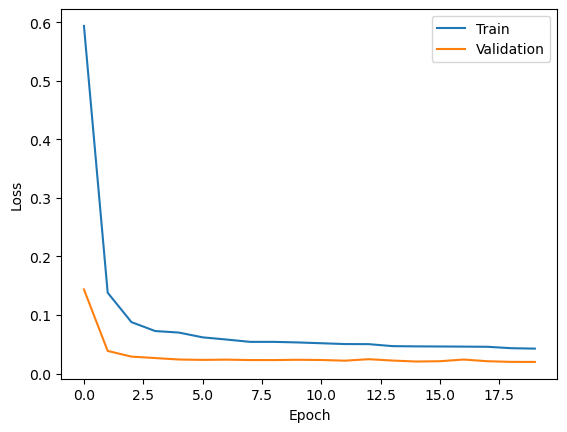

In [112]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [117]:
def forecasts(
    model,
    df,
    feature_scaler,
    target_scaler,
    seq_len=12,
    features=["resistance_pct", "prescribing_rate", "month"],
    horizon=6
):
    
    forecast_rows = [] #to store each forecast result here, one per time series
    grouped_series = df.groupby(
        ["geography", "organism", "stratum"]
    )
    for(geography, organism, stratum), series_df in grouped_series:

        series_df = series_df.sort_values("date")

        #from this time series use the last 12 rows
        recent_history = (
            series_df[features]
            .iloc[-seq_len:]
            .copy())

        recent_history[["resistance_pct", "prescribing_rate"]] = (
            feature_scaler.transform(
                recent_history[["resistance_pct", "prescribing_rate"]]
            )
        )
        #reshape the data to look like what the lstm expects  (samples, time_steps, features)
        # (1 series, 12months, 3)
        model_input = recent_history.values.reshape(
            1, seq_len, len(features)
        )

        forecast_scaled  = model.predict(model_input, verbose=0)[0]

        #inverse scaled forecasts to actual values
      # inverse-scale resistance_pct only
        forecast = target_scaler.inverse_transform(
            forecast_scaled.reshape(-1, 1)
            ).flatten()
        
        #Create future dates
        last_date = series_df["date"].max()
        future_dates = pd.date_range(
            start=last_date + pd.DateOffset(months=1),
            periods=horizon,
            freq="MS"
        )
        for date, pred in zip(future_dates, forecast):
            forecast_rows.append({
                "geography": geography,
                "organism": organism,
                "stratum": stratum,
                "date": date,
                "forecast_resistance_pct": pred
        })   
    return pd.DataFrame(forecast_rows)

In [118]:
forecast_df = forecasts(
    model,
    lstm_df,
    feature_scaler=feature_scaler,
    target_scaler=target_scaler
)

In [119]:
forecast_df.head()

,geography,organism,stratum,date,forecast_resistance_pct
0,East Midlands,E-coli,Amikacin,2025-07-01,3.639682
1,East Midlands,E-coli,Amikacin,2025-08-01,3.748894
2,East Midlands,E-coli,Amikacin,2025-09-01,4.274257
3,East Midlands,E-coli,Amikacin,2025-10-01,4.528107
4,East Midlands,E-coli,Amikacin,2025-11-01,4.498344


In [86]:
forecast_df.to_csv("lstm_forecast.csv")